Вариант 14

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import sigmaclip, t
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
data_test = pd.read_csv('./test.csv')
data_train = pd.read_csv('./train.csv')

In [3]:
data_train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
data_test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [5]:
data_train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152862 entries, 0 to 152861
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    152862 non-null  int64  
 1   Gender                152862 non-null  object 
 2   Age                   152862 non-null  int64  
 3   Driving_License       152862 non-null  int64  
 4   Region_Code           152862 non-null  float64
 5   Previously_Insured    152862 non-null  int64  
 6   Vehicle_Age           152862 non-null  object 
 7   Vehicle_Damage        152862 non-null  object 
 8   Annual_Premium        152862 non-null  float64
 9   Policy_Sales_Channel  152862 non-null  float64
 10  Vintage               152862 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 12.8+ MB


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229292 entries, 0 to 229291
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    229292 non-null  int64  
 1   Gender                229292 non-null  object 
 2   Age                   229292 non-null  int64  
 3   Driving_License       229292 non-null  int64  
 4   Region_Code           229292 non-null  float64
 5   Previously_Insured    229292 non-null  int64  
 6   Vehicle_Age           229292 non-null  object 
 7   Vehicle_Damage        229292 non-null  object 
 8   Annual_Premium        229292 non-null  float64
 9   Policy_Sales_Channel  229292 non-null  float64
 10  Vintage               229292 non-null  int64  
 11  Response              229292 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 21.0+ MB


In [8]:
data_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000
mean,234460.942475,38.554987,0.998138,26.420207,0.489062,30730.076549,111.923669,154.194425,0.164079
std,139490.034283,15.231658,0.043114,13.191474,0.499881,17054.686028,54.308261,83.727049,0.370348
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115085.000000,25.000000,1.000000,15.000000,0.000000,24564.000000,26.000000,82.000000,0.000000
50%,230564.500000,36.000000,1.000000,28.000000,0.000000,31709.000000,140.000000,154.000000,0.000000
75%,345683.500000,49.000000,1.000000,35.000000,1.000000,39470.000000,152.000000,227.000000,0.000000
max,508144.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
print(f"Unique values for Gender: {data_test.Gender.unique()}")
print(f"Unique values for Vehicle_Damage: {data_test.Vehicle_Damage.unique()}")
print(f"Unique values for Vehicle_Age: {data_test.Vehicle_Age.unique()}")
print(f"Unique values for Gender in training data: {data_train.Gender.unique()}")
print(f"Unique values for Vehicle_Damage in training data: {data_train.Vehicle_Damage.unique()}")
print(f"Unique values for Vehicle_Age in training data: {data_train.Vehicle_Age.unique()}")

Unique values for Gender: ['Male' 'Female']
Unique values for Vehicle_Damage: ['No' 'Yes']
Unique values for Vehicle_Age: ['< 1 Year' '1-2 Year' '> 2 Years']
Unique values for Gender in training data: ['Male' 'Female']
Unique values for Vehicle_Damage in training data: ['No' 'Yes']
Unique values for Vehicle_Age in training data: ['1-2 Year' '< 1 Year' '> 2 Years']


In [10]:
enc = OneHotEncoder()

enc.fit_transform(data_test[['Gender']])
dummies = pd.get_dummies(data_test.Gender)
data_test = data_test.join(dummies)
data_test.drop(['Gender'], axis=1, inplace=True)

enc.fit_transform(data_test[['Vehicle_Damage']])
dummies = pd.get_dummies(data_test.Vehicle_Damage)
data_test = data_test.join(dummies)
data_test.drop(['Vehicle_Damage'], axis=1, inplace=True)

enc.fit_transform(data_test[['Vehicle_Age']])
dummies = pd.get_dummies(data_test.Vehicle_Age)
data_test = data_test.join(dummies)
data_test.drop(['Vehicle_Age'], axis=1, inplace=True)

enc.fit_transform(data_test[['Previously_Insured']])
dummies = pd.get_dummies(data_test.Previously_Insured)
data_test = data_test.join(dummies)
data_test.drop(['Previously_Insured'], axis=1, inplace=True)


enc.fit_transform(data_train[['Gender']])
dummies = pd.get_dummies(data_train.Gender)
data_train = data_train.join(dummies)
data_train.drop(['Gender'], axis=1, inplace=True)

enc.fit_transform(data_train[['Vehicle_Damage']])
dummies = pd.get_dummies(data_train.Vehicle_Damage)
data_train = data_train.join(dummies)
data_train.drop(['Vehicle_Damage'], axis=1, inplace=True)

enc.fit_transform(data_train[['Vehicle_Age']])
dummies = pd.get_dummies(data_train.Vehicle_Age)
data_train = data_train.join(dummies)
data_train.drop(['Vehicle_Age'], axis=1, inplace=True)

enc.fit_transform(data_train[['Previously_Insured']])
dummies = pd.get_dummies(data_train.Previously_Insured)
data_train = data_train.join(dummies)
data_train.drop(['Previously_Insured'], axis=1, inplace=True)


In [11]:
data_test

,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Female,Male,No,Yes,1-2 Year,< 1 Year,> 2 Years,0,1
0,151069,23,1,41.0,27117.0,152.0,79,0,1,1,0,0,1,0,0,1
1,460048,42,1,28.0,63230.0,26.0,287,1,0,1,0,1,0,0,0,1
2,362380,47,1,28.0,40571.0,124.0,265,0,1,0,1,1,0,0,0,1
3,191116,23,1,41.0,28049.0,152.0,226,0,1,1,0,0,1,0,0,1
4,422660,42,1,41.0,32520.0,124.0,292,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152857,368806,42,1,35.0,27976.0,124.0,277,0,1,0,1,1,0,0,0,1
152858,55749,23,1,32.0,25777.0,152.0,280,1,0,1,0,0,1,0,0,1
152859,112077,31,1,29.0,2630.0,152.0,209,1,0,1,0,0,1,0,0,1
152860,443675,22,1,29.0,53202.0,152.0,224,1,0,1,0,0,1,0,0,1


In [12]:
data_test.drop(['Driving_License'], axis=1, inplace=True)
data_test.drop(['Region_Code'], axis=1, inplace=True)
data_train.drop(['Driving_License'], axis=1, inplace=True)
data_train.drop(['Region_Code'], axis=1, inplace=True)

In [13]:
data_test

,id,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Female,Male,No,Yes,1-2 Year,< 1 Year,> 2 Years,0,1
0,151069,23,27117.0,152.0,79,0,1,1,0,0,1,0,0,1
1,460048,42,63230.0,26.0,287,1,0,1,0,1,0,0,0,1
2,362380,47,40571.0,124.0,265,0,1,0,1,1,0,0,0,1
3,191116,23,28049.0,152.0,226,0,1,1,0,0,1,0,0,1
4,422660,42,32520.0,124.0,292,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152857,368806,42,27976.0,124.0,277,0,1,0,1,1,0,0,0,1
152858,55749,23,25777.0,152.0,280,1,0,1,0,0,1,0,0,1
152859,112077,31,2630.0,152.0,209,1,0,1,0,0,1,0,0,1
152860,443675,22,53202.0,152.0,224,1,0,1,0,0,1,0,0,1


In [14]:
numerical_data = [
    'Age',
    'Annual_Premium',
    'Policy_Sales_Channel',
    'Vintage'
]

data_test[numerical_data] = MinMaxScaler().fit_transform(data_test[numerical_data])
data_train[numerical_data] = MinMaxScaler().fit_transform(data_train[numerical_data])


In [15]:
data_test

,id,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Female,Male,No,Yes,1-2 Year,< 1 Year,> 2 Years,0,1
0,151069,0.046154,0.049722,0.932099,0.238754,0,1,1,0,0,1,0,0,1
1,460048,0.338462,0.123052,0.154321,0.958478,1,0,1,0,1,0,0,0,1
2,362380,0.415385,0.077041,0.759259,0.882353,0,1,0,1,1,0,0,0,1
3,191116,0.046154,0.051615,0.932099,0.747405,0,1,1,0,0,1,0,0,1
4,422660,0.338462,0.060693,0.759259,0.975779,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152857,368806,0.338462,0.051466,0.759259,0.923875,0,1,0,1,1,0,0,0,1
152858,55749,0.046154,0.047001,0.932099,0.934256,1,0,1,0,0,1,0,0,1
152859,112077,0.169231,0.000000,0.932099,0.688581,1,0,1,0,0,1,0,0,1
152860,443675,0.030769,0.102689,0.932099,0.740484,1,0,1,0,0,1,0,0,1


In [16]:
data_train_responce = data_train.Response
data_train.drop(['Response'], axis=1, inplace=True)

In [17]:
x_train, x_val, y_train, y_val = train_test_split(data_train, data_train_responce, train_size=0.7, random_state=123, shuffle=True, stratify=data_train_responce)

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


rfmodel = RandomForestClassifier(max_depth=10,
                                 min_samples_leaf=6, 
                                 n_estimators=150,
                                 random_state=50,
                                 max_samples=5000,
                                 )
rfmodel.fit(x_train, y_train) 
y_train_predicted_rf = rfmodel.predict_proba(x_train)[:, 1]
y_val_predicted_rf = rfmodel.predict_proba(x_val)[:, 1]

In [19]:
test_id = data_test.index
y_test_predicted = rfmodel.predict_proba(data_test)[:, 1]

In [20]:
data_train

,id,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Female,Male,No,Yes,1-2 Year,< 1 Year,> 2 Years,0,1
0,213892,0.430769,0.041471,0.154321,0.262976,0,1,1,0,1,0,0,0,1
1,269011,0.584615,0.113315,0.154321,0.162630,0,1,0,1,1,0,0,1,0
2,31464,0.369231,0.050968,0.154321,0.955017,0,1,1,0,1,0,0,0,1
3,86379,0.030769,0.060292,0.932099,0.588235,1,0,0,1,0,1,0,1,0
4,456843,0.061538,0.040033,0.932099,0.024221,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229287,50272,0.800000,0.068001,0.765432,0.799308,0,1,1,0,1,0,0,0,1
229288,254780,0.015385,0.000000,0.932099,0.422145,0,1,1,0,0,1,0,0,1
229289,380053,0.353846,0.000000,0.956790,0.778547,0,1,0,1,0,0,1,1,0
229290,69958,0.000000,0.052704,0.981481,0.020761,1,0,0,1,0,1,0,0,1


In [21]:
roc_auc_score(y_train, y_train_predicted_rf)

0.9223412891938243

In [22]:
roc_auc_score(y_val, y_val_predicted_rf)

0.9186629998354721

In [23]:
def roc_auc_plot(y_train, y_train_predicted, y_val, y_val_predicted):
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_val, y_val_predicted)

    plt.figure(figsize=(10,7))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

In [24]:
def create_submission(id_col, y_pred):
    submission = pd.DataFrame({
        'id': id_col,
        'Response': y_pred
    })
    return submission

submission = create_submission(data_test.id, y_test_predicted)
submission.to_csv("./submission.csv", index=False)


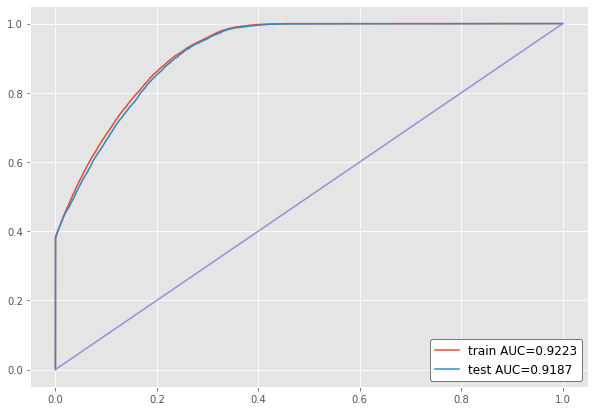

In [25]:
roc_auc_plot(y_train, y_train_predicted_rf, y_val, y_val_predicted_rf)